<a href="https://colab.research.google.com/github/Mfys212/TextClassifier/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mfys212/TextClassifier
!pip install -r TextClassifier/requirements.txt

Cloning into 'TextClassifier'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 121 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (121/121), 35.88 KiB | 5.98 MiB/s, done.
Resolving deltas: 100% (45/45), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd

train = pd.read_csv("/content/train.csv", header=None)
test = pd.read_csv("/content/test.csv", header=None)
train

,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
train[0].value_counts()

,count
0,
3,30000
4,30000
2,30000
1,30000


In [5]:
def clean(df):
    data = df.copy()
    for i in range(1, 3):
        data[i] = data[i].str.replace(r'<.*?>', ' ', regex=True)
        data[i] = data[i].str.replace(r'\\n', ' ', regex=True)
        data[i] = data[i].str.replace(r'[^\w\s?.]', '', regex=True)
    data["Text"] = data[1] + ' [SEP] ' + data[2]
    data["Class"] = df[0]
    data = data.drop(columns=[0, 1, 2])
    data = data.dropna()
    data = data.reset_index(drop=True)
    return data

train = clean(train)
test = clean(test)
train.head()

,Text,Class
0,Wall St. Bears Claw Back Into the Black Reuter...,3
1,Carlyle Looks Toward Commercial Aerospace Reut...,3
2,Oil and Economy Cloud Stocks Outlook Reuters [...,3
3,Iraq Halts Oil Exports from Main Southern Pipe...,3
4,Oil prices soar to alltime record posing new m...,3


In [6]:
X_train = train["Text"].tolist()
y_train = train["Class"].tolist()

X_test = test["Text"].tolist()
y_test = test["Class"].tolist()

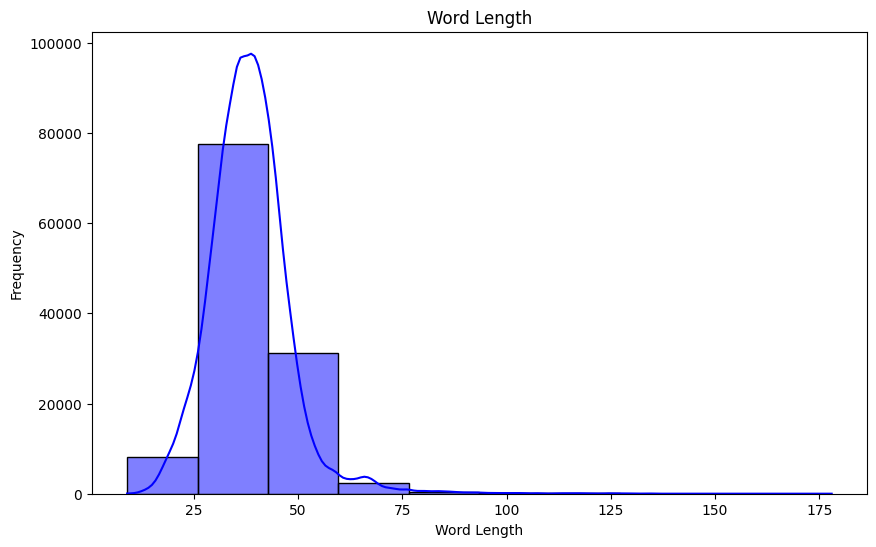

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def panjang_kata(text):
    return len(text.split())

train['Panjang_Kata'] = train['Text'].apply(panjang_kata)


plt.figure(figsize=(10,6))
sns.histplot(train['Panjang_Kata'], kde=True, bins=10, color='blue')
plt.title('Word Length')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

# input data (X_train, X_test, y_train, y_test) harus berbentuk list

In [8]:
import torch
import torch.nn as nn
from TextClassifier.trainer.train import CreateModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

model = CreateModel(X_train, y_train,
                 X_test, y_test,
                 batch=32,
                 seq=100,
                 embedding_dim=512,
                 n_layers=2,
                 dropout_rate=0.1,
                 num_classes=4)

Loading setup data ...
Loading train data ...
Loading val data ...
Successful load model


In [9]:
EPOCHS = 5

# LSTM

In [10]:
model.LSTM()
history = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=0.001, loss=nn.CrossEntropyLoss)

Validation: 100%|██████████| 238/238 [00:03<00:00, 71.78batch/s]


Epoch 1/5 | Train Loss: 1.0561 | Train Acc: 0.4698 | Val Loss: 0.3757 | Val Acc: 0.8759



Validation: 100%|██████████| 238/238 [00:03<00:00, 71.04batch/s]


Epoch 2/5 | Train Loss: 0.2919 | Train Acc: 0.9039 | Val Loss: 0.2727 | Val Acc: 0.9079



Validation: 100%|██████████| 238/238 [00:03<00:00, 68.47batch/s]


Epoch 3/5 | Train Loss: 0.1832 | Train Acc: 0.9412 | Val Loss: 0.2533 | Val Acc: 0.9146



Validation: 100%|██████████| 238/238 [00:03<00:00, 66.98batch/s]


Epoch 4/5 | Train Loss: 0.1239 | Train Acc: 0.9602 | Val Loss: 0.2631 | Val Acc: 0.9178



Validation: 100%|██████████| 238/238 [00:03<00:00, 66.90batch/s]

Epoch 5/5 | Train Loss: 0.0860 | Train Acc: 0.9733 | Val Loss: 0.2933 | Val Acc: 0.9182

Restored model to the best state based on validation loss.


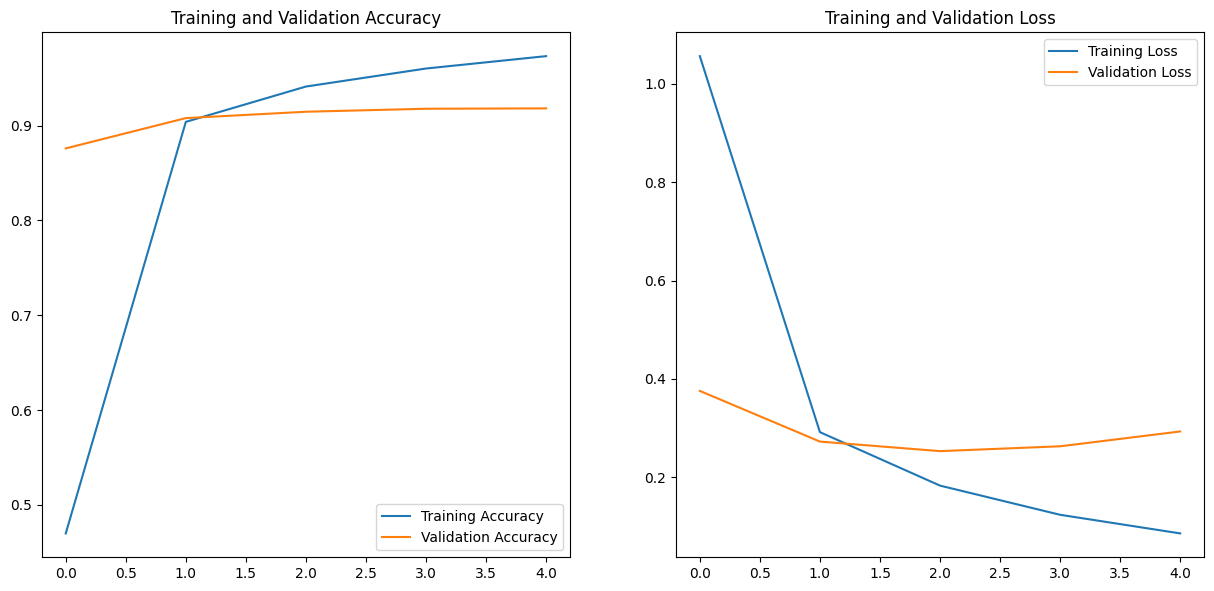

In [11]:
epochs_range = range(EPOCHS)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history['Train Acc'], label='Training Accuracy')
plt.plot(epochs_range, history['Val Acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history['Train Loss'], label='Training Loss')
plt.plot(epochs_range, history['Val Loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation: 100%|██████████| 238/238 [00:03<00:00, 72.40batch/s]


Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Akurasi: 0.92


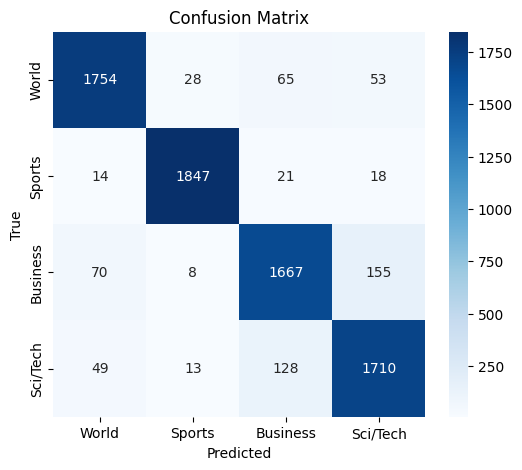

In [12]:
y_true, y_pred = model.eval()
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Akurasi: {accuracy:.2f}")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# GRU

In [13]:
model.GRU()
history = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=0.001, loss=nn.CrossEntropyLoss)

Validation: 100%|██████████| 238/238 [00:03<00:00, 76.68batch/s]


Epoch 1/5 | Train Loss: 0.3655 | Train Acc: 0.8642 | Val Loss: 0.2348 | Val Acc: 0.9186



Validation: 100%|██████████| 238/238 [00:02<00:00, 81.70batch/s]


Epoch 2/5 | Train Loss: 0.1694 | Train Acc: 0.9433 | Val Loss: 0.2331 | Val Acc: 0.9225



Validation: 100%|██████████| 238/238 [00:02<00:00, 82.04batch/s]


Epoch 3/5 | Train Loss: 0.1042 | Train Acc: 0.9654 | Val Loss: 0.2628 | Val Acc: 0.9167



Validation: 100%|██████████| 238/238 [00:02<00:00, 81.94batch/s]


Epoch 4/5 | Train Loss: 0.0700 | Train Acc: 0.9761 | Val Loss: 0.2946 | Val Acc: 0.9199



Validation: 100%|██████████| 238/238 [00:02<00:00, 81.73batch/s]

Epoch 5/5 | Train Loss: 0.0560 | Train Acc: 0.9803 | Val Loss: 0.3065 | Val Acc: 0.9182

Restored model to the best state based on validation loss.


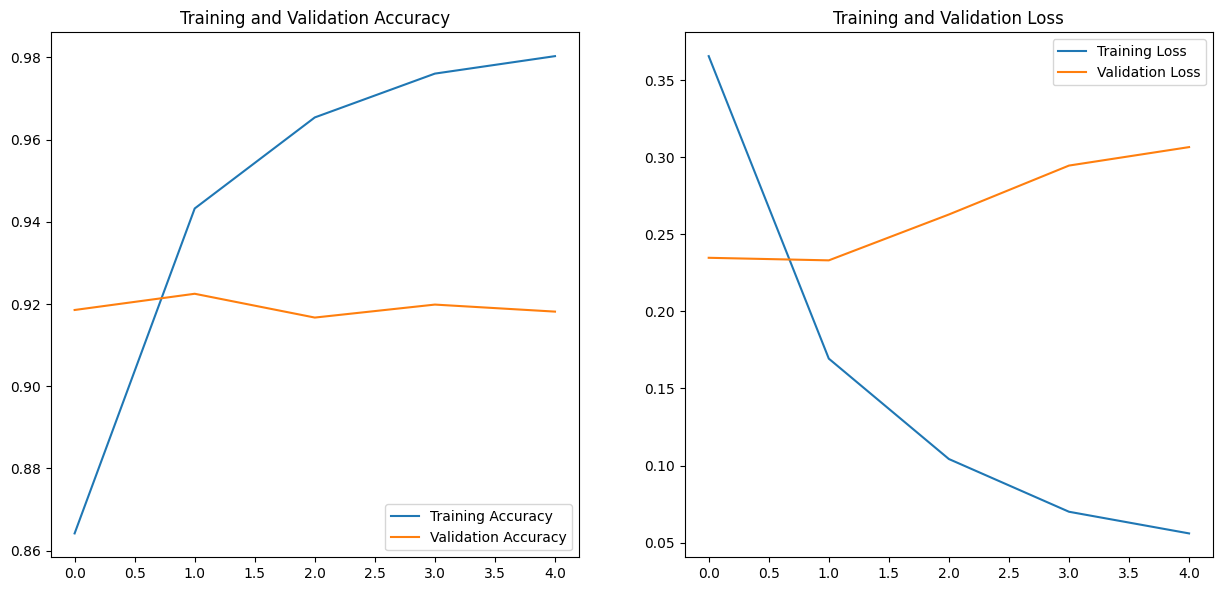

In [14]:
epochs_range = range(EPOCHS)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history['Train Acc'], label='Training Accuracy')
plt.plot(epochs_range, history['Val Acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history['Train Loss'], label='Training Loss')
plt.plot(epochs_range, history['Val Loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation: 100%|██████████| 238/238 [00:03<00:00, 79.01batch/s]


Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Akurasi: 0.92


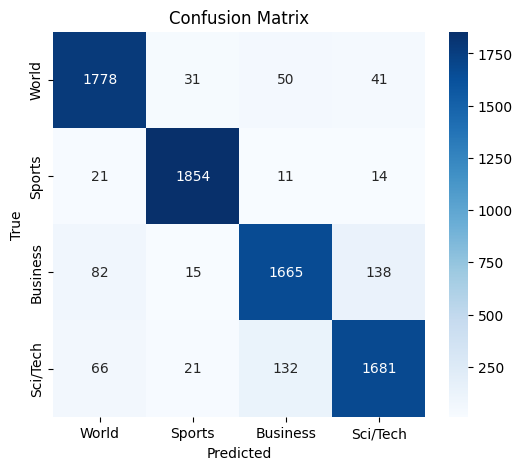

In [15]:
y_true, y_pred = model.eval()
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Akurasi: {accuracy:.2f}")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Transformer

In [16]:
model.TRANSFORMER()
history = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=0.001, loss=nn.CrossEntropyLoss)

Validation: 100%|██████████| 238/238 [00:02<00:00, 87.91batch/s]


Epoch 1/5 | Train Loss: 0.4528 | Train Acc: 0.8338 | Val Loss: 0.3019 | Val Acc: 0.8979



Validation: 100%|██████████| 238/238 [00:02<00:00, 89.16batch/s]


Epoch 2/5 | Train Loss: 0.2456 | Train Acc: 0.9176 | Val Loss: 0.2880 | Val Acc: 0.9000



Validation: 100%|██████████| 238/238 [00:02<00:00, 82.60batch/s]


Epoch 3/5 | Train Loss: 0.1854 | Train Acc: 0.9380 | Val Loss: 0.2670 | Val Acc: 0.9142



Validation: 100%|██████████| 238/238 [00:02<00:00, 87.52batch/s]


Epoch 4/5 | Train Loss: 0.1475 | Train Acc: 0.9499 | Val Loss: 0.2707 | Val Acc: 0.9137



Validation: 100%|██████████| 238/238 [00:02<00:00, 87.34batch/s]

Epoch 5/5 | Train Loss: 0.1198 | Train Acc: 0.9589 | Val Loss: 0.3051 | Val Acc: 0.9028

Restored model to the best state based on validation loss.


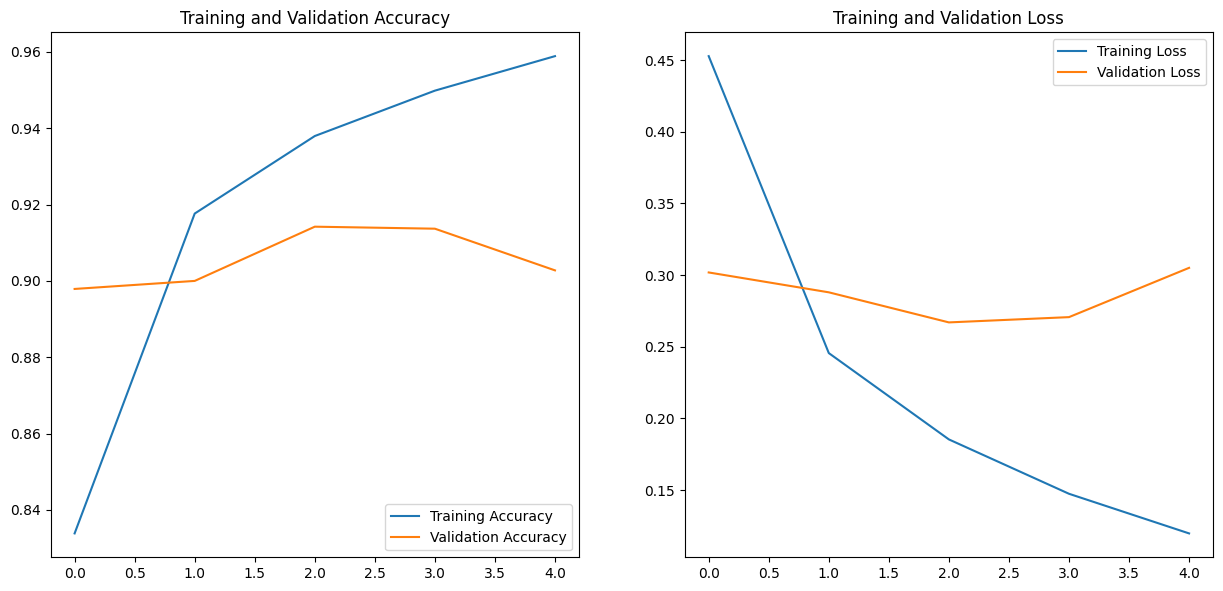

In [17]:
epochs_range = range(EPOCHS)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history['Train Acc'], label='Training Accuracy')
plt.plot(epochs_range, history['Val Acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history['Train Loss'], label='Training Loss')
plt.plot(epochs_range, history['Val Loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation: 100%|██████████| 238/238 [00:02<00:00, 87.73batch/s]


Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Akurasi: 0.90


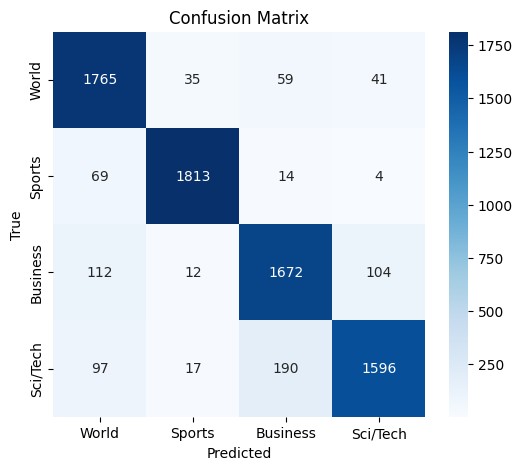

In [18]:
y_true, y_pred = model.eval()
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Akurasi: {accuracy:.2f}")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# BERT

In [19]:
model.BERT()
history = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=0.001, loss=nn.CrossEntropyLoss)

Validation: 100%|██████████| 238/238 [00:02<00:00, 89.16batch/s]


Epoch 1/5 | Train Loss: 0.5796 | Train Acc: 0.7698 | Val Loss: 0.3441 | Val Acc: 0.8872



Validation: 100%|██████████| 238/238 [00:03<00:00, 78.58batch/s]


Epoch 2/5 | Train Loss: 0.2824 | Train Acc: 0.9066 | Val Loss: 0.2965 | Val Acc: 0.9014



Validation: 100%|██████████| 238/238 [00:02<00:00, 87.15batch/s]


Epoch 3/5 | Train Loss: 0.2233 | Train Acc: 0.9257 | Val Loss: 0.3182 | Val Acc: 0.8980



Validation: 100%|██████████| 238/238 [00:02<00:00, 88.34batch/s]


Epoch 4/5 | Train Loss: 0.1848 | Train Acc: 0.9370 | Val Loss: 0.2779 | Val Acc: 0.9108



Validation: 100%|██████████| 238/238 [00:02<00:00, 84.24batch/s]

Epoch 5/5 | Train Loss: 0.1563 | Train Acc: 0.9462 | Val Loss: 0.2738 | Val Acc: 0.9155

Restored model to the best state based on validation loss.


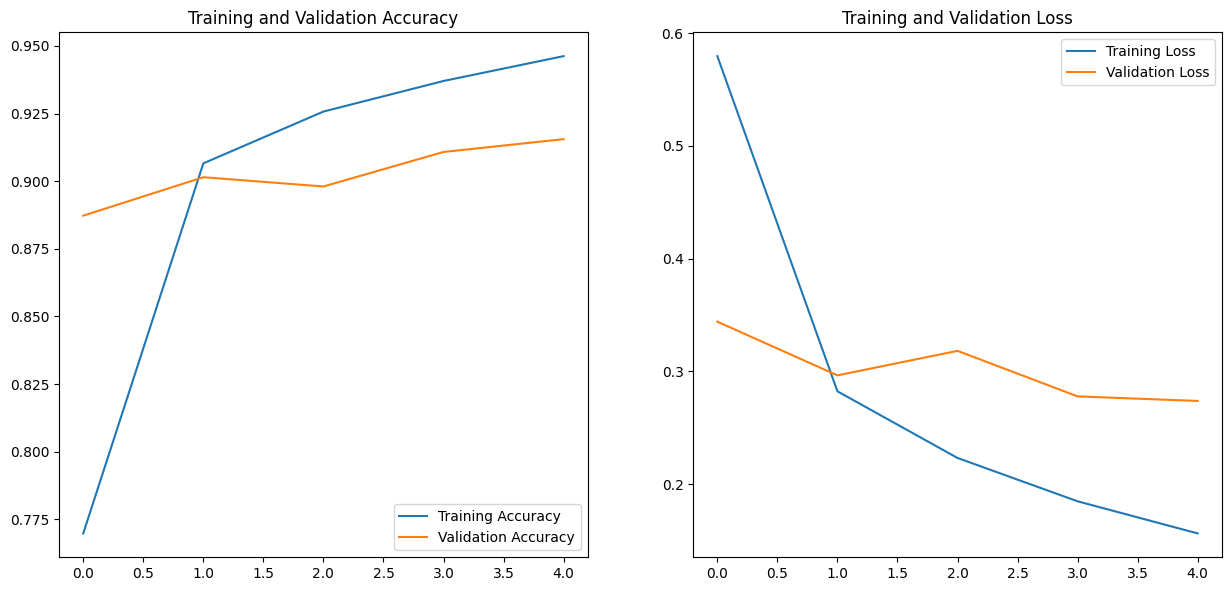

In [20]:
epochs_range = range(EPOCHS)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history['Train Acc'], label='Training Accuracy')
plt.plot(epochs_range, history['Val Acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history['Train Loss'], label='Training Loss')
plt.plot(epochs_range, history['Val Loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation: 100%|██████████| 238/238 [00:02<00:00, 80.23batch/s]


Precision: 0.92
Recall: 0.91
F1 Score: 0.92
Akurasi: 0.91


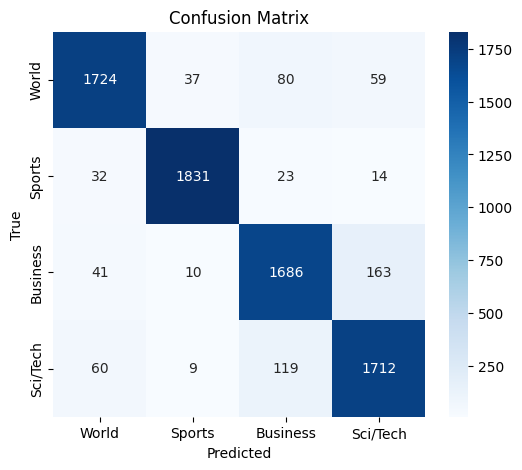

In [21]:
y_true, y_pred = model.eval()
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Akurasi: {accuracy:.2f}")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'],
            yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()